In [37]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('D:\Datasets\haberman.csv', header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])

In [3]:
dataset.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            306 non-null    int64
 1   year_of_treatment              306 non-null    int64
 2   positive_lymph_nodes           306 non-null    int64
 3   survival_status_after_5_years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
dataset.shape

(306, 4)

In [6]:
dataset.survival_status_after_5_years.unique()

array([1, 2], dtype=int64)

In [7]:
dataset['survival_status_after_5_years']=dataset['survival_status_after_5_years'].map({1:'Yes', 2:'No'})
dataset['survival_status_after_5_years']=dataset['survival_status_after_5_years'].astype('category')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            306 non-null    int64   
 1   year_of_treatment              306 non-null    int64   
 2   positive_lymph_nodes           306 non-null    int64   
 3   survival_status_after_5_years  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [10]:
dataset.describe()

,age,year_of_treatment,positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


<AxesSubplot:>

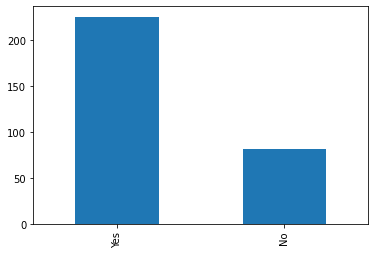

In [14]:
dataset['survival_status_after_5_years'].value_counts().plot(kind='bar')

In [16]:
dataset['survival_status_after_5_years'].value_counts(normalize=True)

Yes    0.735294
No     0.264706
Name: survival_status_after_5_years, dtype: float64

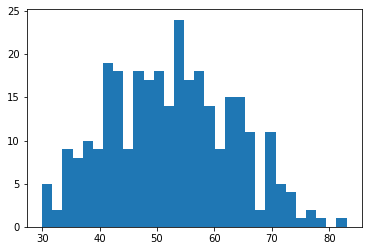

In [19]:
plt.hist(dataset['age'], bins=30)
plt.show()

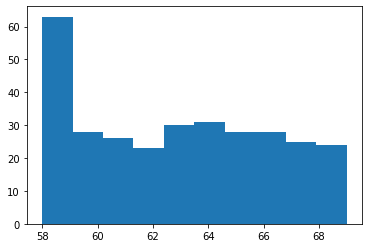

In [25]:
plt.hist(dataset['year_of_treatment'])
plt.show()

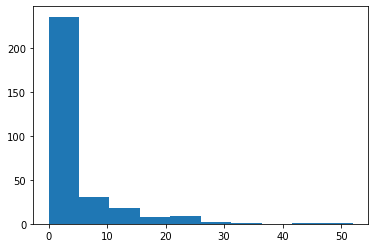

In [26]:
plt.hist(dataset['positive_lymph_nodes'])
plt.show()

## Observations:
1. The age of the patients vary from 30 to 83 with the median of 52.
2. Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes
3. The dataset contains only a small number of records (306).
4. The target column is imbalanced with 73% of values are 'yes'

### Univariate Analysis

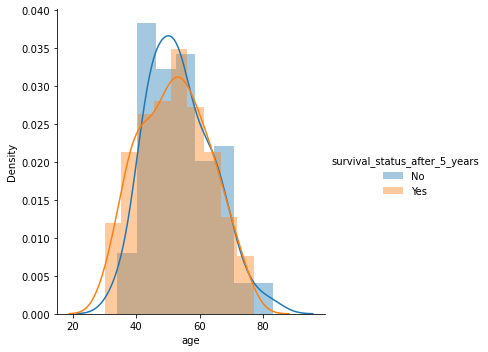

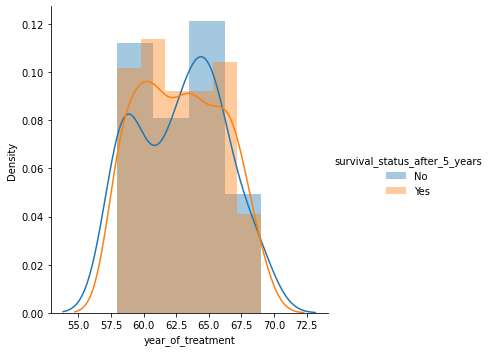

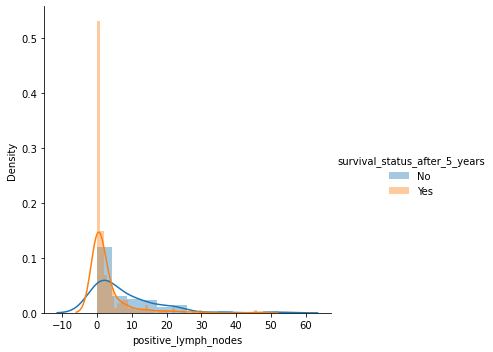

In [40]:
for index, feature in enumerate(list(dataset)[:-1]):
    fg=sns.FacetGrid(dataset, hue='survival_status_after_5_years' , size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year_of_treatment *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* positive_lymph_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.996732

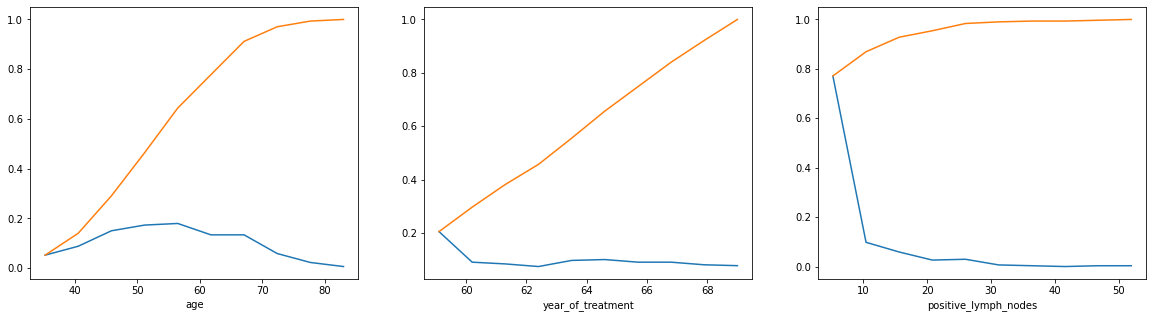

In [44]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(dataset.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(dataset[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

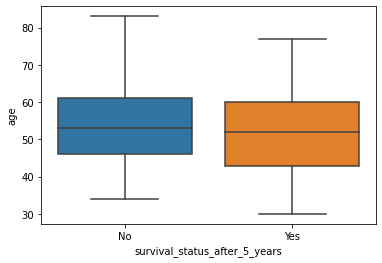

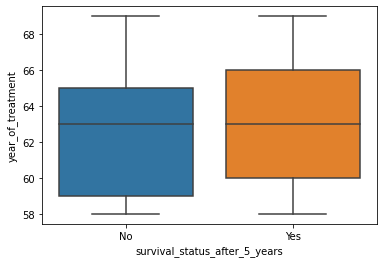

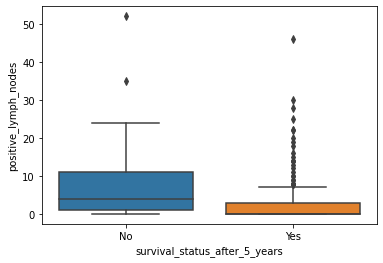

In [58]:
for idx, feature in enumerate(list(dataset.columns)[:-1]):
    sns.boxplot(x='survival_status_after_5_years', y=feature, data=dataset)
    plt.show()

### Multivariate Analysis

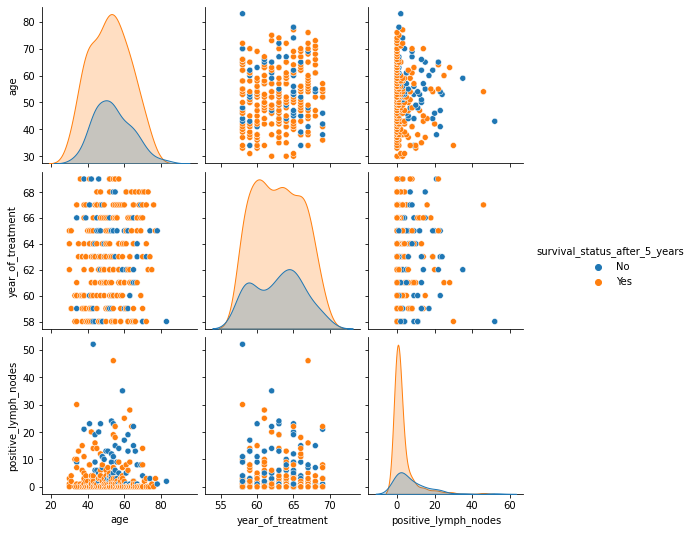

In [60]:
sns.pairplot(dataset,hue='survival_status_after_5_years')
plt.show()